In [177]:
import hist
import numpy as np
from plot_utils import adjust_plot
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from utils_v1 import *

from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

awkward version  1.10.3
coffea version  0.7.21


In [178]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
import mplhep as hep
hep.style.use("CMS")

In [180]:
year = 2017
era = "2017"

if era == "2016":
    jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
    filename = 'samples/flatPU_JMENano_2016.txt'
    year =2016
    
if era == '2016APV':
    jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"    
    filename = 'samples/flatPU_JMENano_2016APV.txt'
    year = 2016
if era == '2017':
    jerfile = "Summer20UL17_JRV1_MC_PtResolution_AK4PFchs.txt"
    filename = 'samples/flatPU_JMENano_2017.txt'
    year = 2017
    more = 'JME'
if era == '2018':
    jerfile = "Summer20UL18_JRV1_MC_PtResolution_AK4PFchs.txt"
    filename = 'samples/flatPU_JMENano_2018.txt'
    year = 2018
    more = 'JME'  #change more according to filename

In [181]:
with open("QCD_pt_response_"+era+more+".pkl", "rb") as f:
    output = pickle.load( f )



In [182]:
hist_0 = output["pt_reco_over_gen"]

In [183]:
hist_0.axes

(StrCategory(['2017'], growth=True, name='dataset', label='Primary dataset'),
 Variable(array([   10.,    11.,    12.,    13.,    14.,    15.,    17.,    20.,
           23.,    27.,    30.,    35.,    40.,    45.,    57.,    72.,
           90.,   120.,   150.,   200.,   300.,   400.,   550.,   750.,
         1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,  5000.,
        10000.]), name='pt', label='$p_{T}$ [GeV]'),
 Regular(300, 0, 2, name='frac', label='Fraction'),
 Variable([0, 0.261, 0.522, 0.783, 1.044, 1.305, 1.566, 1.74, 1.93, 2.043, 2.172, 2.322, 2.5, 2.65, 2.853, 2.964, 3.139, 3.489, 3.839, 5.191], name='eta', label='$\\eta$'),
 Variable([0, 10, 20, 30, 40, 50, 60, 70, 80], name='pileup', label='$\\mu$'))

In [184]:
datasets = hist_0.axes["dataset"].centers
pt_bins = hist_0.axes["pt"].edges
frac_bins = hist_0.axes["frac"].edges
eta_bins = hist_0.axes["eta"].edges
pileup_bins = hist_0.axes["pileup"].edges
#rho_bins = hist_0.axes[5].edges

pt_values = hist_0.axes[1].centers
frac_values = hist_0.axes["frac"].centers
eta_values = hist_0.axes["eta"].centers
pileup_values = hist_0.axes["pileup"].centers
#rho_values = hist_0.axes[5].centers

pt_widths = hist_0.axes[1].widths
frac_widths = hist_0.axes["frac"].widths
eta_widths = hist_0.axes["eta"].widths
pileup_widths = hist_0.axes["pileup"].widths
#rho_widths = hist_0.axes[5].widths

In [44]:
if era == '2017':
    rho_axis = hist.axis.Variable( [0, 7.39, 13.4, 19.42, 25.44, 31.46, 37.48 ])
if era == '2018':
    rho_axis = hist.axis.Variable( [0, 7.34, 13.24, 19.14, 25.05, 30.95, 36.85])
rho_values = rho_axis.centers

In [45]:
def jerfunc(x, p0, p1, p2, p3):
    return np.sqrt(p0*np.abs(p0)/(x*x)+p1*p1*np.power(x,p3) + p2*p2)




In [46]:
rho_values

array([ 3.695, 10.395, 16.41 , 22.43 , 28.45 , 34.47 ])

In [47]:
# import pandas as pd
# eras = [ '2017', '2018']
# eras = ['2017'] #testing for 2017 only
# df_fit = pd.DataFrame({"rho_low":[], "rho_high":[], "eta_low":[], "eta_high":[], "par0":[],"par0_unc":[], "par1":[],"par1_unc":[],
#                        "par2":[],"par2_unc":[], "par3":[],"par3_unc":[] , "era":[]})

# for era in eras:

#     if era == "2016":
#         jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
#         filename = 'samples/flatPU_JMENano_2016.txt'
#         year =2016
#         more = "_premix"
#     if era == '2016APV':
#         jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"    
#         filename = 'samples/flatPU_JMENano_2016APV.txt'
#         year = 2016
#         more = "_premix"
#     if era == '2017':
#         jerfile = "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt"
#         filename = 'samples/flatPU_JMENano_2017.txt'
#         year = 2017
#         more = "JMEv2"
#     if era == '2018':
#         jerfile = "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
#         filename = 'samples/flatPU_JMENano_2018.txt'
#         year = 2018
#         more = ""
#     import itertools
#     plt.figure(figsize = (40,9))
#     with open("QCDresponse_"+era+more+".pkl", "rb") as f:
#         output = pickle.load( f )
#     hist_0 = output["pt_reco_over_gen"]
#     for i_rho in range(4):
#         fig = plt.figure(figsize = (40,9))
#         gs = gridspec.GridSpec(nrows=2, ncols=4, height_ratios=[4, 1], hspace = 0.15)
#         for i_eta in range(3):
#             hist_rho_pt_frac = hist_0.project("eta","rho","pt","frac").to_numpy()[0][i_eta]
            
#             #ax = plt.subplot(1,4,i_eta+1)
#             ax = plt.subplot(gs[i_eta])
#             markers = itertools.cycle(['o', 's', 'v', '^', 'D'])
#             hist_pt_frac = hist_rho_pt_frac[i_rho]
#             histfit = Histfit(hist_pt_frac, frac_values, pt_values)
#             histfit.store_parameters()

#             sigma_list = histfit.parameters["sigma"]
#             sigma_error_list  = np.array(histfit.parameters["sigmaErr"])
            
#             #4.608         0.4947         0.1052        -0.9417
#             sel = (pt_values>=30) & (pt_values<=2000)
#             #print(sel)
#             popt,pcov = curve_fit(jerfunc,  np.array(pt_values[sel], dtype = 'float64'),  np.array(sigma_list[sel], dtype = 'float64') , sigma = np.array(sigma_error_list[sel],dtype = 'float64') , bounds =([-10,-5,-5,-5],[10,2,1,5]) )    

#             df_fit2 = pd.DataFrame({"rho_low":[rho_bins[i_rho]], "rho_high":[rho_bins[i_rho+1]], "eta_low":[eta_bins[i_eta]], "eta_high":[eta_bins[i_eta+1]], 
#                                     "par0":[popt[0]],"par0_unc":[np.sqrt(pcov[0][0])], "par1":[popt[1]],"par1_unc":[np.sqrt(pcov[1][1])],
#                                     "par2":[popt[2]],"par2_unc":[np.sqrt(pcov[2][2])], "par3":[popt[3]],"par3_unc":[np.sqrt(pcov[3][3])] , "era":[era]})
#             df_fit = pd.concat([df_fit,df_fit2])
            
#             ax.errorbar(pt_values, sigma_list, np.power(sigma_error_list, 0.5), xerr = pt_widths/2,   linestyle = "",  
#                         label ="Coffea based", fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7, color = 'blue')

#             plt.plot(pt_values[pt_values>=30], jerfunc(pt_values[pt_values>=30], *popt), label = 'Fit', color = 'red')
#             plt.xlabel(r"$p_{T,gen}$ (GeV)")
#             plt.ylabel("JER")
#             plt.xscale("log")
#             plt.ylim(0.02, 0.250)
            
#             plt.errorbar(x = pt_values[sel], y = [computeJER(pt = pt,eta = eta_values[i_eta],rho = rho_values[i_rho], filename = jerfile) for pt in pt_values[sel]], fmt = next(markers) ,
#                              label = "From txt file",linestyle = "", markersize = 5, markerfacecolor='none', color = 'black')
#             plt.legend()
#             plt.text(400, 0.14, str(round(eta_bins[i_eta],1))+r'$ <\eta \leq $'+str(round(eta_bins[i_eta+1],1)))
#             plt.text(400, 0.12, str(round(rho_bins[i_rho],1))+r'$ <\rho \leq $'+str(round(rho_bins[i_rho+1],1)))
#             hep.cms.label( year = era )
            
#             ax2 = plt.subplot(gs[(i_eta+1)*2 -1])
            
#             ax2.errorbar(x = pt_values[sel], y = sigma_list[sel]/np.array([computeJER(pt = pt,eta = eta_values[i_eta],rho = rho_values[i_rho], filename = jerfile) for pt in pt_values[sel]]), np.power(sigma_error_list[sel]//np.array([computeJER(pt = pt,eta = eta_values[i_eta],rho = rho_values[i_rho], filename = jerfile) for pt in pt_values[sel]]), 0.5), xerr = pt_widths/2,   linestyle = "",  
#                         label ="Coffea based", fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7, color = 'blue')
            



<Figure size 4000x1500 with 0 Axes>

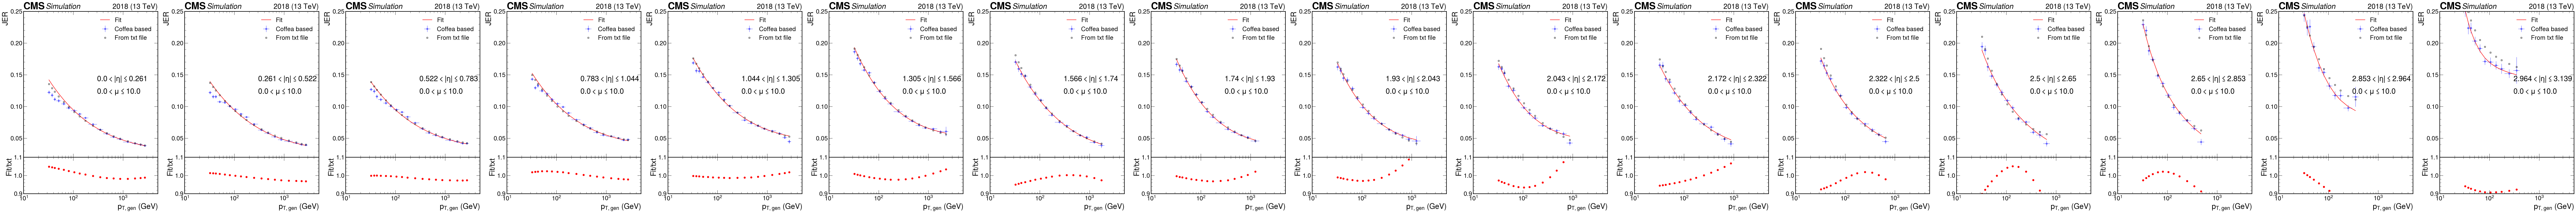

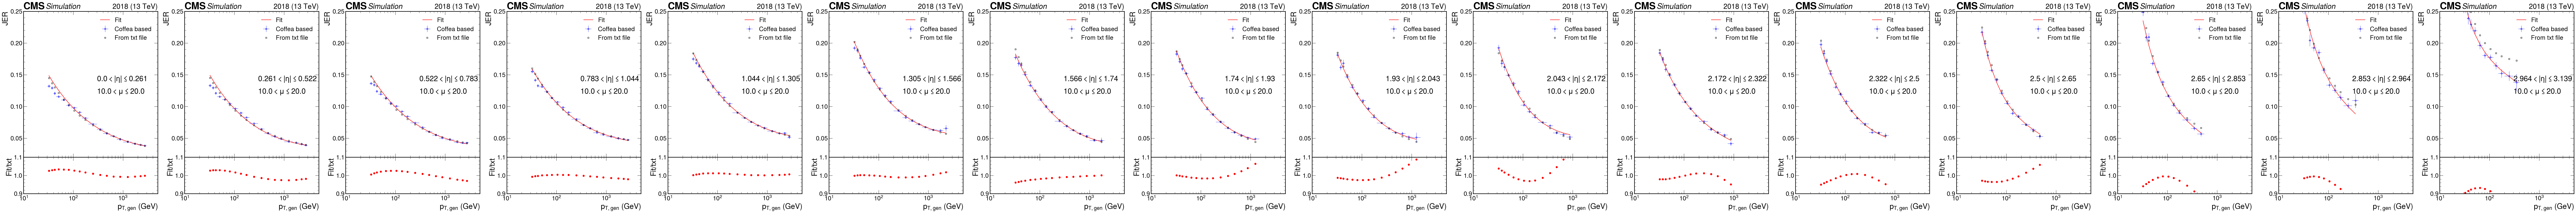

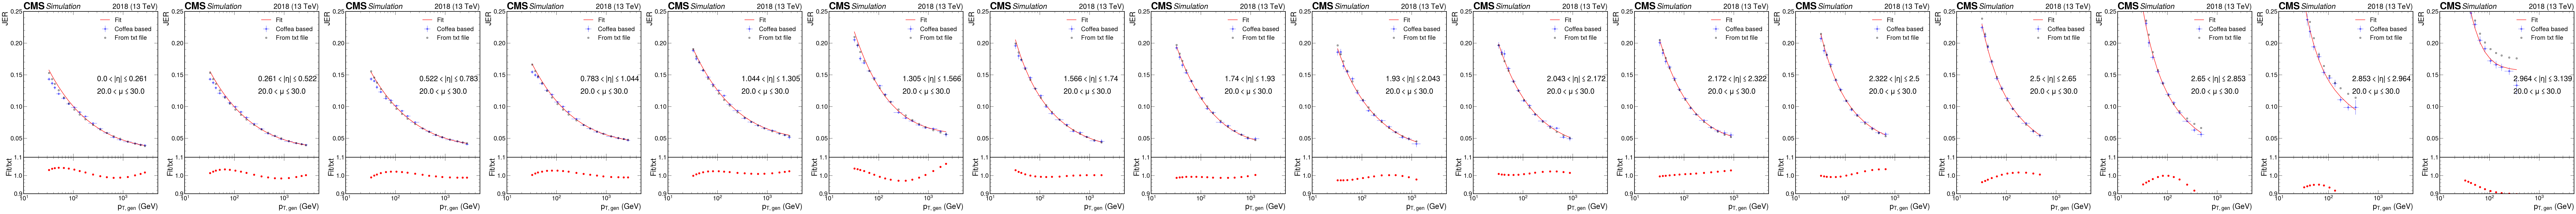

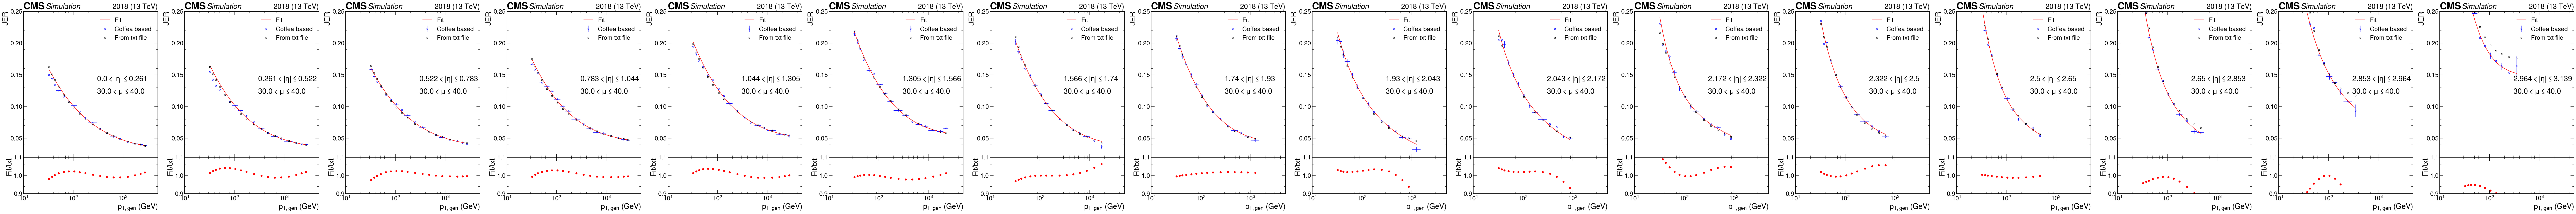

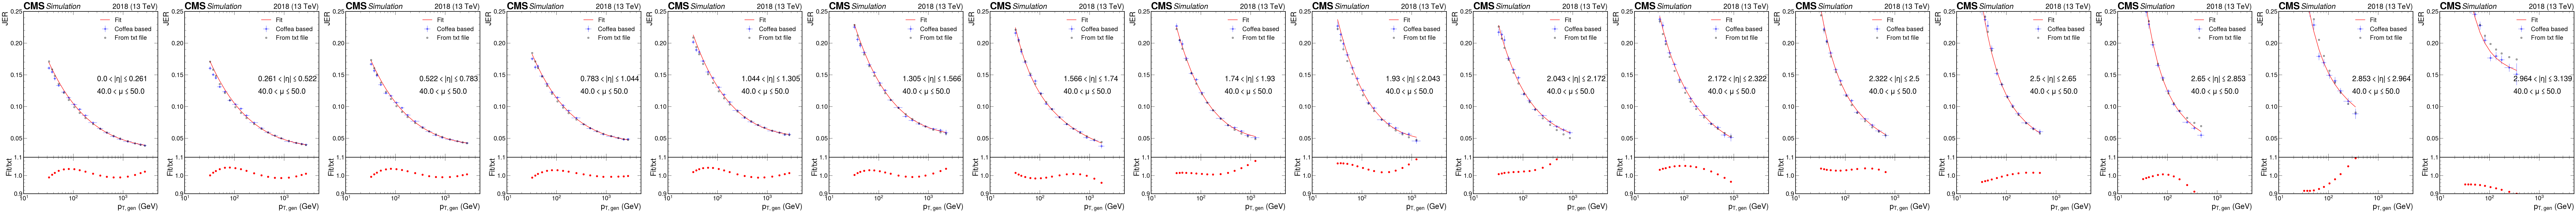

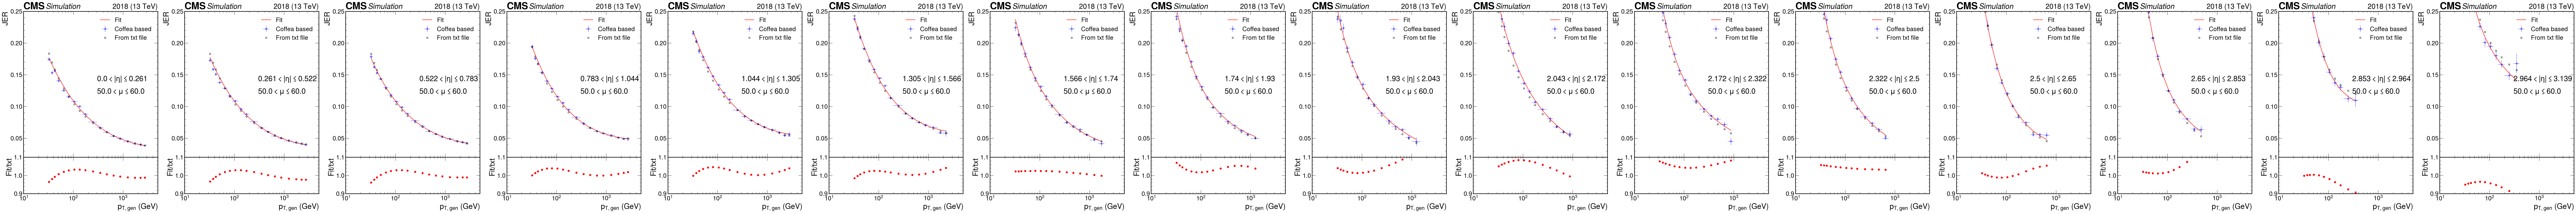

In [148]:
#vs pileup (then converted to rho value using the relation derived)

import pandas as pd
#eras = ['2017', '2018']
eras = ['2018']
df_fit = pd.DataFrame({ "eta_low":[], "eta_high":[], "pileup_low":[], "par0":[],"par0_unc":[], "par1":[],"par1_unc":[],
                       "par2":[],"par2_unc":[], "par3":[],"par3_unc":[] , "era":[]})
n_rho_min = 0
n_rho_max = 6
n_eta_min = 0
n_eta_max = 16
n_rho = n_rho_max - n_rho_min
n_eta = n_eta_max - n_eta_min
for era in eras:

    if era == "2016":
        jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2016.txt'
        year =2016
        more = "_premix"
    if era == '2016APV':
        jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"    
        filename = 'samples/flatPU_JMENano_2016APV.txt'
        year = 2016
        more = "_premix"
    if era == '2017':
        jerfile = "Summer20UL17_JRV1_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2017.txt'
        year = 2017
        more = "JME"
    if era == '2018':
        jerfile = "Summer20UL18_JRV1_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2018.txt'
        year = 2018
        more = "JME"
    import itertools
    plt.figure(figsize = (40,15))
    with open("QCD_pt_response_"+era+more+".pkl", "rb") as f:
        output = pickle.load( f )
    hist_0 = output["pt_reco_over_gen"]
    
    for i_rho in range(n_rho_min, n_rho_max):
        fig = plt.figure(figsize = (10*n_eta,11.5))
        gs = gridspec.GridSpec(nrows=2, ncols= n_eta, height_ratios=[4, 1], hspace = 0.0)
        for i_eta in range(n_eta_min, n_eta_max):
            hist_rho_pt_frac = hist_0.project("eta","pileup","pt","frac").to_numpy()[0][i_eta]
            
            ax = plt.subplot(gs[i_eta - n_eta_min])
            markers = itertools.cycle(['o', 's', 'v', '^', 'D'])
            hist_pt_frac = hist_rho_pt_frac[i_rho]
            histfit = Histfit(hist_pt_frac, frac_values, pt_values)
            histfit.store_parameters()

            sigma_list = histfit.parameters["sigma"]
            sigma_error_list  = np.array(histfit.parameters["sigmaErr"])
            

            sel = (histfit.parameters["sigma"] != None ) & (pt_values>=30) & (pt_values<=3000)
            
            p0 = returnParm(eta = eta_values[i_eta],rho = rho_values[i_rho], filename = jerfile)
            range_factor = 1
            high_bound = np.array(p0) + range_factor* np.abs(p0)
            low_bound = np.array(p0)- range_factor*np.abs(p0)
            
            temp_sigma_list = np.array(sigma_list[sel], dtype = 'float64')
            if len( temp_sigma_list [temp_sigma_list != None] ) > 2:
                popt,pcov = curve_fit(jerfunc,  np.array(pt_values[sel], dtype = 'float64'),  np.array(sigma_list[sel], dtype = 'float64') , 
                                      sigma = np.array(sigma_error_list[sel],dtype = 'float64') , p0 = p0, bounds =(low_bound, high_bound) )    

                df_fit2 = pd.DataFrame({ "eta_low":[eta_bins[i_eta]], "eta_high":[eta_bins[i_eta+1]], "pileup_low": [pileup_bins[i_rho]],"pileup_high": [pileup_bins[i_rho+1]],
                                        "par0":[popt[0]],"par0_unc":[np.sqrt(pcov[0][0])], "par1":[popt[1]],"par1_unc":[np.sqrt(pcov[1][1])],
                                        "par2":[popt[2]],"par2_unc":[np.sqrt(pcov[2][2])], "par3":[popt[3]],"par3_unc":[np.sqrt(pcov[3][3])] , "era":[era]})
                df_fit = pd.concat([df_fit,df_fit2])

                ax.errorbar(pt_values[sel], sigma_list[sel], np.power(sigma_error_list[sel], 0.5), xerr = pt_widths[sel]/2,   linestyle = "",  
                            label ="Coffea based", fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7, color = 'blue')

                #ax.errorbar(pt_values, sigma_list, label ="Coffea based", fmt = next(markers), markersize = 5, markerfacecolor='none', linewidth = 0.7, color = 'blue')
                plt.plot(pt_values[sel], jerfunc(pt_values[sel], *popt), label = 'Fit', color = 'red')
                plt.xlim(10,5000)

                plt.ylabel("JER")
                plt.xscale("log")
                plt.ylim(0.02, 0.250)
                ax.set_xticklabels('')

                plt.errorbar(x = pt_values[sel], y = [computeJER(pt = pt,eta = eta_values[i_eta],rho = rho_values[i_rho], filename = jerfile) for pt in pt_values[sel]], fmt = next(markers) ,
                                 label = "From txt file",linestyle = "", markersize = 5, markerfacecolor='none', color = 'black')
                hep.cms.label( year = era )


                plt.legend()
                plt.text(300, 0.14, str(round(eta_bins[i_eta],3))+r'$ <|\eta| \leq $'+str(round(eta_bins[i_eta+1],3)))
                plt.text(300, 0.12, str(round(pileup_bins[i_rho],0))+r'$ <\mu \leq $'+str(round(pileup_bins[i_rho+1],0)))

                #ratio plot
                ax2 = plt.subplot(gs[n_eta+i_eta - n_eta_min])


                ratio2 = jerfunc(pt_values[sel], *popt)/np.reshape([computeJER(pt = pt,eta = eta_values[i_eta],rho = rho_values[i_rho], filename = jerfile) for pt in pt_values[sel]], len(pt_values[sel]))

                ax2.plot(pt_values[sel], ratio2, color = 'r', label = 'Fit/txt', marker = 'o', linestyle = '')
                plt.ylim(0.9, 1.1)

                ax2.set_xlim(10,5000)
                ax2.set_xscale('log')
                ax2.set_xlabel(r"$p_{T,gen}$ (GeV)")
                ax2.set_ylabel('Fit/txt')
        plt.savefig("plots/"+era+"_"+str(round(eta_bins[i_eta],3))+"_" +str(round(pileup_bins[i_rho],1))+".png", dpi = 100)
            

In [149]:
df17 = df_fit
#df18 = df_fit

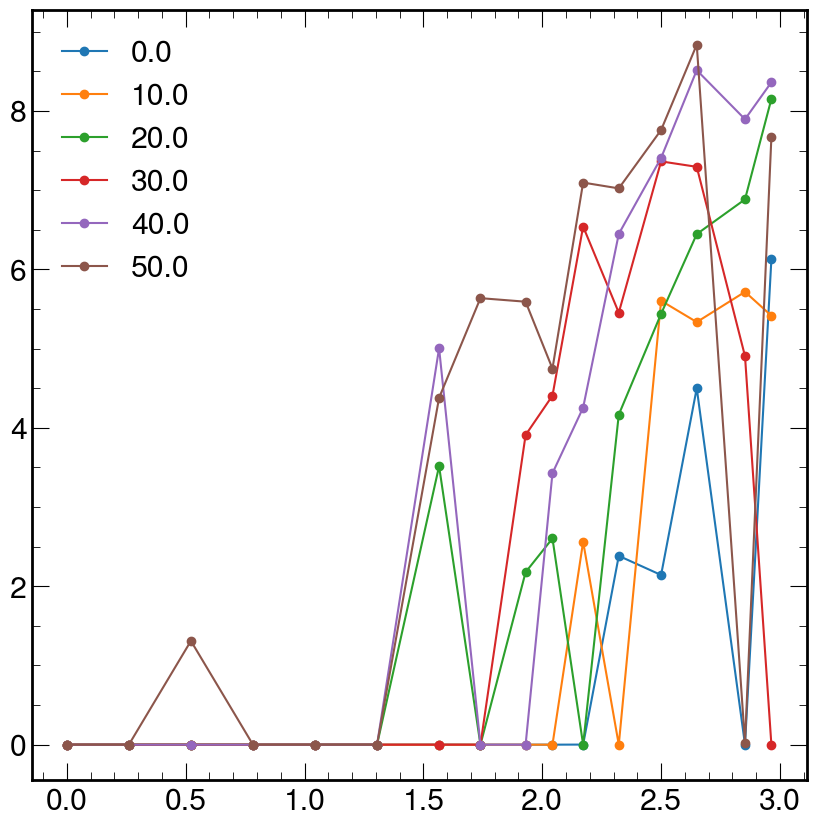

In [150]:
grouped_df17 = df17.groupby("pileup_low")
for name, group in grouped_df17:
    plt.plot(group['eta_low'], group['par0'], label=name, marker = "o")
plt.legend()

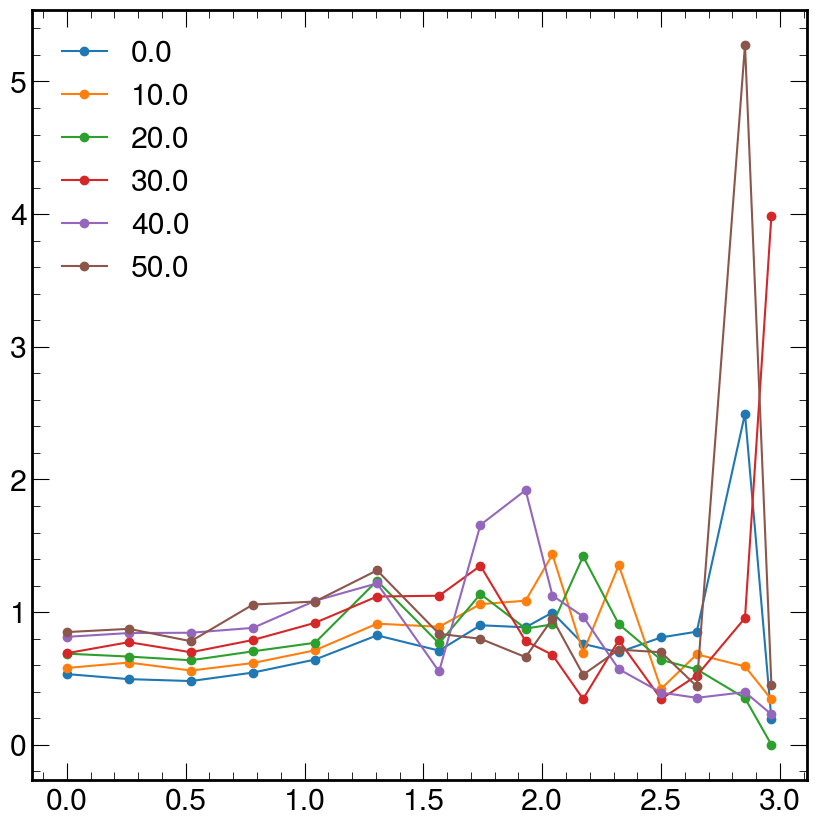

In [151]:
grouped_df17 = df17.groupby("pileup_low")
for name, group in grouped_df17:
    plt.plot(group['eta_low'], group['par1'], label=name, marker = "o")
plt.legend()

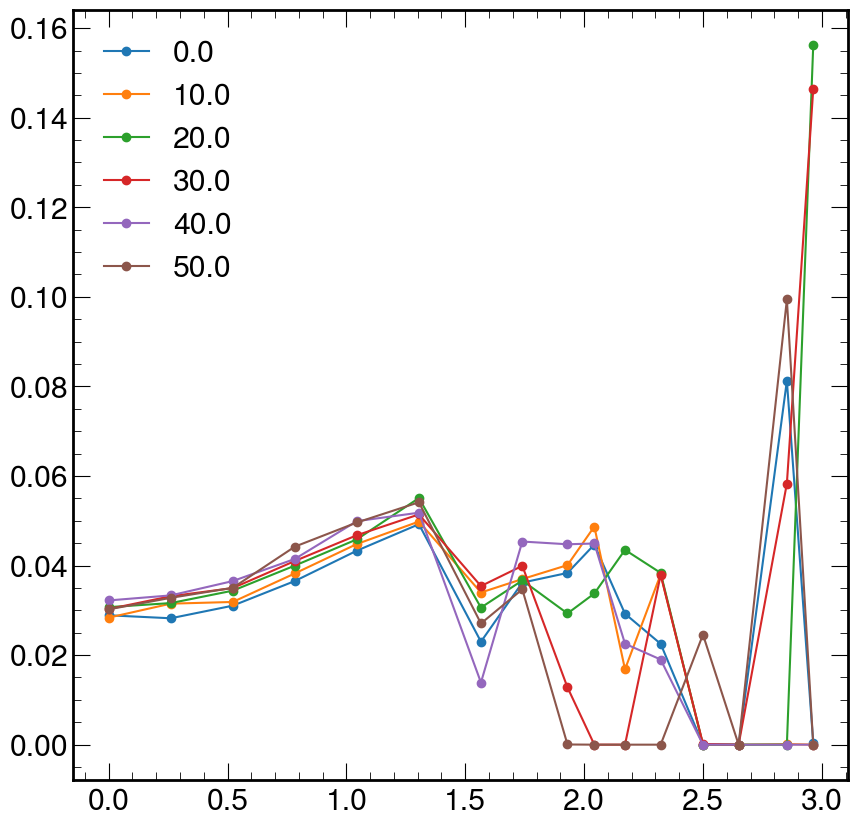

In [152]:
grouped_df17 = df17.groupby("pileup_low")
for name, group in grouped_df17:
    plt.plot(group['eta_low'], group['par2'], label=name, marker = "o")
plt.legend()

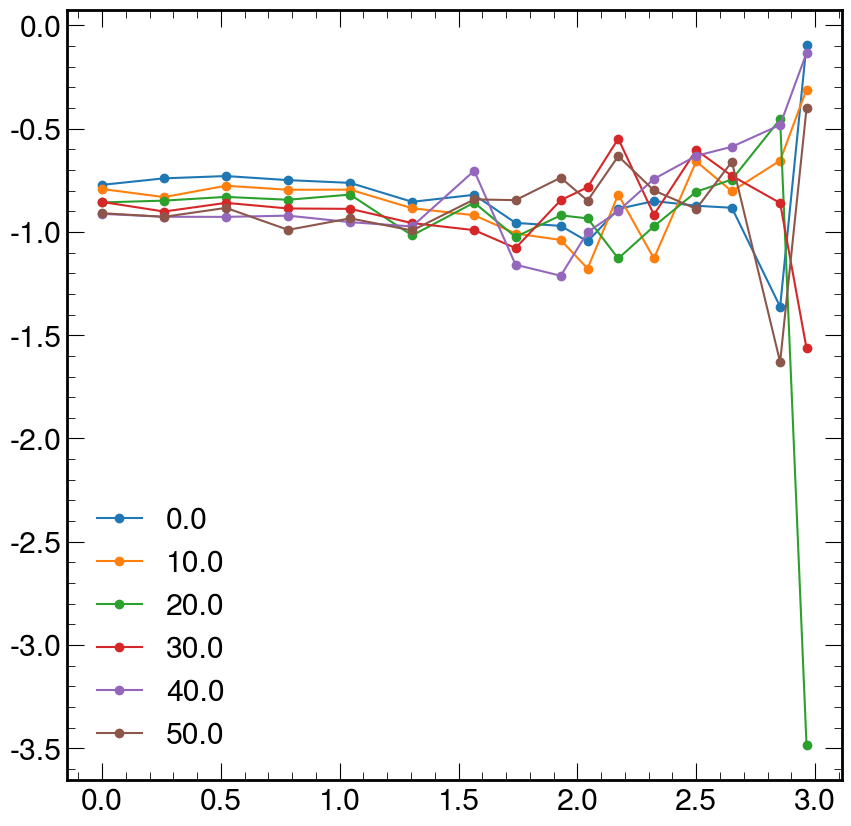

In [153]:
grouped_df17 = df17.groupby("pileup_low")
for name, group in grouped_df17:
    plt.plot(group['eta_low'], group['par3'], label=name, marker = "o")
plt.legend()

In [174]:
def round_to_sf(number, sf):
    """
    Round a number to a specified number of significant figures.
    """
    from math import log10, floor

    if number == 0:
        return 0

    magnitude = sf - floor(log10(abs(number))) - 1
    rounded_number = round(number, max(magnitude,4))

    return rounded_number

In [175]:

grouped_eta_17 = df17.groupby("eta_low")
filepath = "derived_17.txt"
with open(filepath, 'w') as file:
    for name, group in grouped_eta_17:
        for i in range(group.shape[0]):
            data = str(group.iloc[i]["eta_low"]) + "\t" + str(group.iloc[i]["eta_high"]) + "\t" + str(group.iloc[i]["pileup_low"]) +"\t" + str(group.iloc[i]["par0"]) + "\n"
            eta_low = str(group.iloc[i]["eta_low"])
            eta_high = str(group.iloc[i]["eta_high"])
            pileup_low = str(int(group.iloc[i]["pileup_low"]))
            pileup_high = str(int(group.iloc[i]["pileup_high"]))
            par0 = str(round_to_sf(group.iloc[i]["par0"],4))
            par1 = str(round_to_sf(group.iloc[i]["par1"],4))
            par2 = str(round_to_sf(group.iloc[i]["par2"],4))
            par3 = str(round_to_sf(group.iloc[i]["par3"],4))
            file.write( f"{eta_low : <10}{ eta_high: <10}{pileup_low: <5}{pileup_high: <5}{par0: <15}{par1: <15}{par2: <25}{par3: <15}\n")


In [176]:
!cat derived_17.txt

0.0       0.261     0    10   9.242e-10      0.5327         0.02889                  -0.772         
0.0       0.261     10   20   2.107e-09      0.579          0.02837                  -0.7919        
0.0       0.261     20   30   1.19e-10       0.6867         0.03071                  -0.8573        
0.0       0.261     30   40   3.723e-05      0.6899         0.03029                  -0.8546        
0.0       0.261     40   50   3.547e-11      0.8135         0.03221                  -0.9124        
0.0       0.261     50   60   1.331e-09      0.8493         0.03022                  -0.9091        
0.261     0.522     0    10   1.303e-08      0.4946         0.02822                  -0.7406        
0.261     0.522     10   20   5.602e-11      0.6195         0.03149                  -0.8314        
0.261     0.522     20   30   1.606e-09      0.6648         0.03162                  -0.8483        
0.261     0.522     30   40   4.88e-13       0.7733         0.03314                  -0.901

In [100]:
group.iloc[i]["eta_low"]

2.853

In [ ]:
for era in eras:
    if era == "2016":
        jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2016.txt'
        year =2016
        more = "_premix"
    if era == '2016APV':
        jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"    
        filename = 'samples/flatPU_JMENano_2016APV.txt'
        year = 2016
        more = "_premix"
    if era == '2017':
        jerfile = "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2017.txt'
        year = 2017
        more = ""
    if era == '2018':
        jerfile = "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2018.txt'
        year = 2018
        more = ""
    with open("QCDresponse_"+era+more+".pkl", "rb") as f:
        output = pickle.load( f )
    hist_0 = output["pt_reco_over_gen"] 
    hist_frac_pt = hist_0.project("pt","frac").to_numpy()[0]
    cm = plt.get_cmap('brg')
    colors = [cm(1.*i/30) for i in range(28)]
    fig = plt.figure(figsize = (12,10))
    ax = plt.subplot()
    ax.set_prop_cycle(color=colors)
    for i in range(28):
        ax.stairs( hist_frac_pt[i]/np.sum(hist_frac_pt[i]),frac_bins,  label = str(int(pt_bins[i]))+r" <$p_T$< "  + str(int(pt_bins[i+1])) )
        ax.set_xlabel("Response")
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
        hep.cms.label(year = era)

In [ ]:
df_fit.tail(16)

In [ ]:
eras = ['2016', '2016APV', '2017', '2018']
for i_era,era in enumerate(eras):
    if era == "2016":
        jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2016.txt'
        year =2016
        more = "_premix"
    if era == '2016APV':
        jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"    
        filename = 'samples/flatPU_JMENano_2016APV.txt'
        year = 2016
        more = "_premix"
    if era == '2017':
        jerfile = "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2017.txt'
        year = 2017
        more = ""
    if era == '2018':
        jerfile = "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2018.txt'
        year = 2018
        more = ""
    with open("QCDresponse_"+era+more+".pkl", "rb") as f:
        output = pickle.load( f )
        colors = ['red', 'blue', 'orange' , 'green']
        hist_0 = output["pt_reco_over_gen"] 
        hist_pt = hist_0.project("pt").to_numpy()[0]
        plt.stairs( hist_pt/((np.sum(hist_pt))* pt_widths),pt_bins,  label = era, color = colors[i_era])
        plt.xlabel(r"$p_T$ (GeV)")
        plt.xscale("log")
        plt.legend(loc = 'upper right', fontsize = 20)
    

In [25]:
eras = ['2016', '2016APV', '2017', '2018']
for i_era,era in enumerate(eras):
    if era == "2016":
        jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2016.txt'
        year =2016
        more = "_premix"
    if era == '2016APV':
        jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"    
        filename = 'samples/flatPU_JMENano_2016APV.txt'
        year = 2016
        more = "_premix"
    if era == '2017':
        jerfile = "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2017.txt'
        year = 2017
        more = ""
    if era == '2018':
        jerfile = "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2018.txt'
        year = 2018
        more = ""
    with open("QCDresponse_"+era+more+".pkl", "rb") as f:
        output = pickle.load( f )
        colors = ['red', 'blue', 'orange' , 'green']
        hist_0 = output["pt_reco_over_gen"] 
        hist_frac = hist_0.project("frac").to_numpy()[0]
        plt.stairs( hist_frac/np.sum(hist_frac),frac_bins,  label = era, color = colors[i_era])
        plt.xlabel(r"Response")
        plt.legend(loc = 'upper right', fontsize = 20)
    

FileNotFoundError: [Errno 2] No such file or directory: 'QCDresponse_2016_premix.pkl'

In [ ]:
eras = ['2016', '2016APV', '2017', '2018']
for i_era,era in enumerate(eras):
    if era == "2016":
        jerfile = "Summer20UL16_JRV3_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2016.txt'
        year =2016
        more = "_premix"
    if era == '2016APV':
        jerfile = "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"    
        filename = 'samples/flatPU_JMENano_2016APV.txt'
        year = 2016
        more = "_premix"
    if era == '2017':
        jerfile = "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2017.txt'
        year = 2017
        more = ""
    if era == '2018':
        jerfile = "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
        filename = 'samples/flatPU_JMENano_2018.txt'
        year = 2018
        more = ""
    with open("QCDresponse_"+era+more+".pkl", "rb") as f:
        output = pickle.load( f )
        colors = ['red', 'blue', 'orange' , 'green']
        hist_0 = output["pt_reco_over_gen"] 
        hist_eta = hist_0.project("eta").to_numpy()[0]
        plt.stairs( hist_eta/(eta_widths*np.sum(hist_eta)),eta_bins,  label = era, color = colors[i_era])
        plt.xlabel(r"$\eta$")
        plt.legend(loc = 'upper right', fontsize = 20)

In [ ]:
def gauss(x,  x0, sigma,a):
        return (a*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)))

In [ ]:
df_fit['par1']

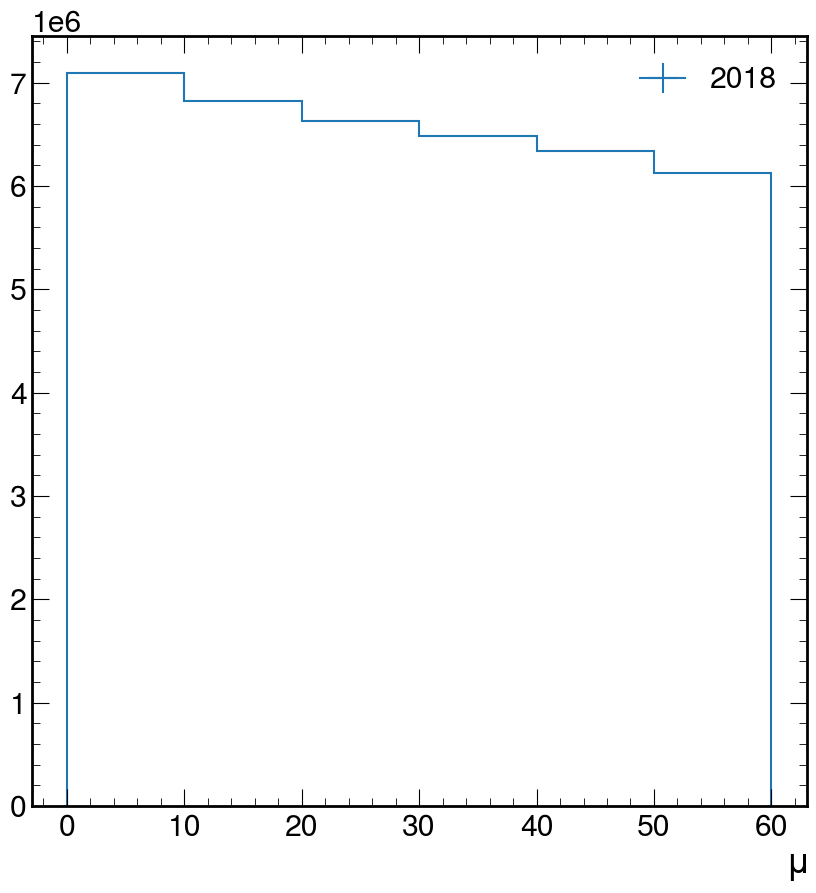

In [12]:
output["pt_reco_over_gen"].project('dataset','pileup').plot()
plt.legend()

In [79]:

with open("QCDresponse-2017JME.pkl", "rb") as f:
    output = pickle.load( f )

In [80]:
hist = output["pileup_rho"]
pileup_centers = hist.axes[1].centers
pileup_widths = hist.axes[1].widths

rho_centers = hist.axes[2].centers
rho_widths = hist.axes[2].widths

In [81]:
pileup_centers

array([ 0.66666667,  2.        ,  3.33333333,  4.66666667,  6.        ,
        7.33333333,  8.66666667, 10.        , 11.33333333, 12.66666667,
       14.        , 15.33333333, 16.66666667, 18.        , 19.33333333,
       20.66666667, 22.        , 23.33333333, 24.66666667, 26.        ,
       27.33333333, 28.66666667, 30.        , 31.33333333, 32.66666667,
       34.        , 35.33333333, 36.66666667, 38.        , 39.33333333])

In [82]:
hist_pileup_rho = hist.project("pileup_fine", "rho_fine")

In [83]:
hist_pileup_rho = hist_pileup_rho.to_numpy()[0]

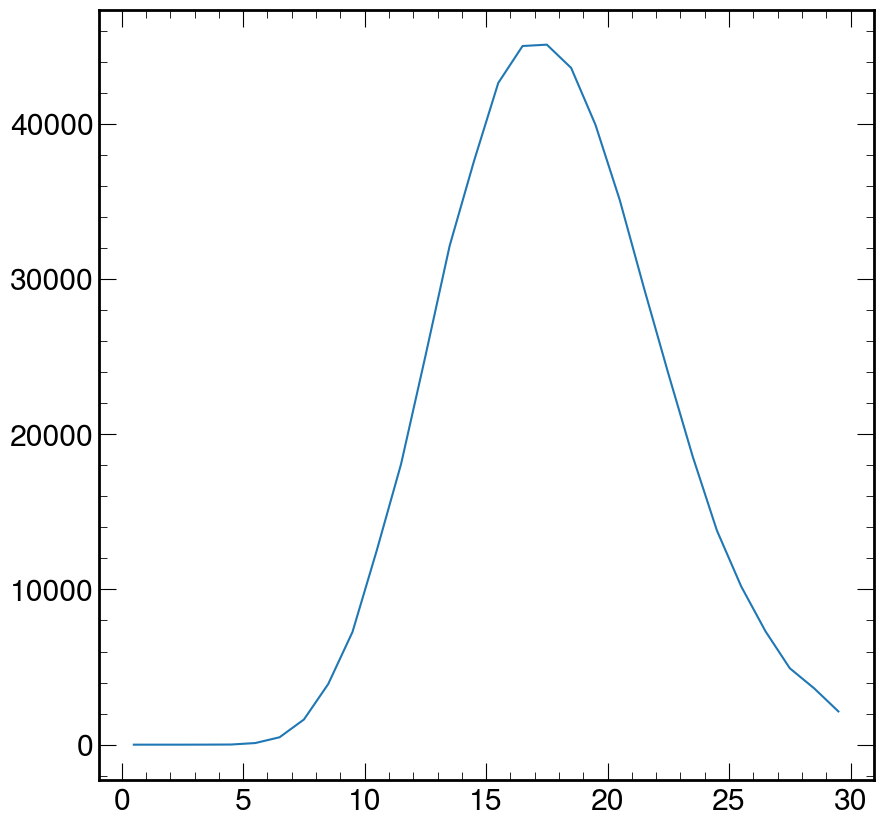

In [84]:
plt.plot(rho_centers,hist_pileup_rho[20])

In [85]:
def mean_finder(hist, centers):
    sum = 0
    weight_sum = 0
    
    for i in range(len(hist)):
        sum = sum + hist[i]*centers[i]
        weight_sum = weight_sum + hist[i]
    return sum/weight_sum

def std_finder(hist, centers):
    sum = 0
    weight_sum = 0
    mean = mean_finder(hist, centers)
    
    for i in range(len(hist)):
        sum = sum + hist[i]*((centers[i] - mean)**2)
        weight_sum = weight_sum + hist[i]
        
    return np.sqrt(sum/(weight_sum - 1))

def sem_finder(hist, centers):
    return std_finder(hist,centers)/(np.sum(hist)**0.5)

def qdline(x, a, b, c):
    return a*x*x + b*x + c

In [86]:
sem_finder(hist_pileup_rho[20], rho_centers )

0.0060704970940415335

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

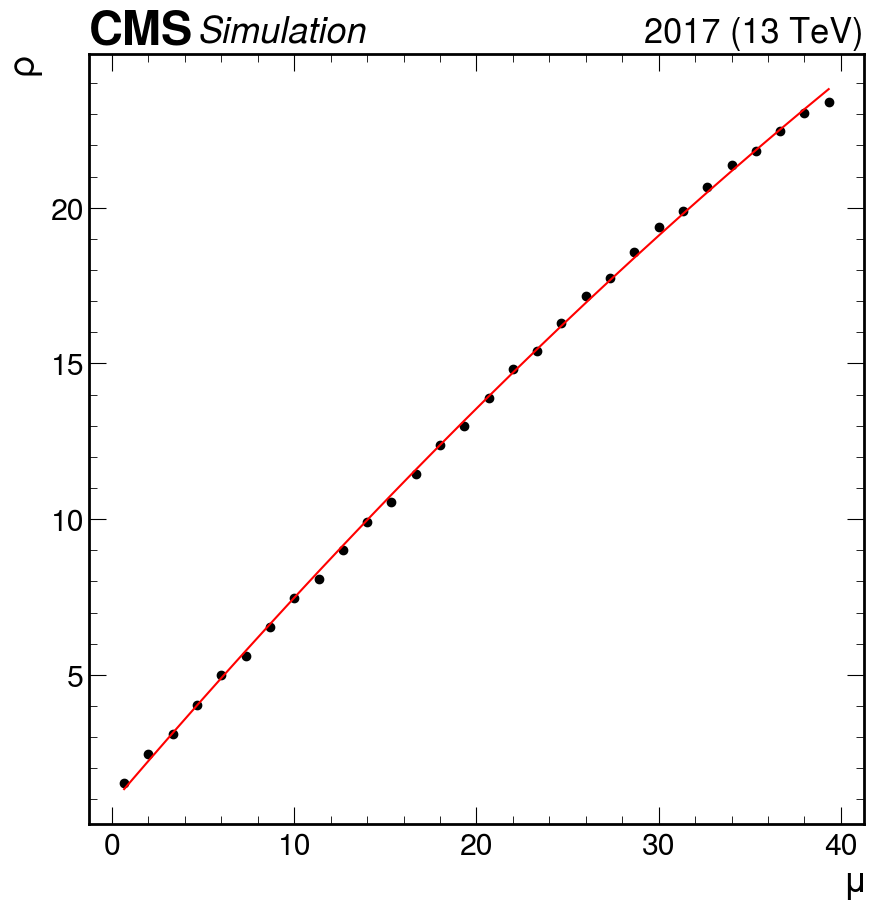

In [88]:
means = []
for i in range(len(hist_pileup_rho)):
    means.append(mean_finder(hist_pileup_rho[i], rho_centers))
    
plt.plot(pileup_centers, means, linestyle = "", marker = 'o', color = 'black')
popt, pcov = curve_fit(qdline, pileup_centers, means)
plt.plot(pileup_centers, qdline(pileup_centers, *popt), label = 'Fit', color = 'r')
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\rho$")
hep.cms.label(year = 2017)

In [63]:
print(*popt)

-0.0022271509741119155 0.661910583565495 0.9866919637997366


In [64]:
popt, pcov = curve_fit(qdline, means,  pileup_centers)
print(*popt)

0.01158731150439658 1.4479339180451356 -1.3542914301628832


In [69]:
def rho2pileup_2017(rho):
    return 0.013043067245506962*rho*rho + 1.3818120253922785*rho -1.101941245332294

def rho2pileup_2018(rho):
    return 0.01158731150439658*rho*rho + 1.4479339180451356*rho -1.4479339180451356

In [74]:
rho = np.array([0, 7.47, 13.49, 19.52, 25.54, 31.57])
print(rho2pileup_2017(rho))
print(rho2pileup_2018(rho))

[-1.10194125  9.94800948 19.91228166 30.84083462 42.69742109 55.52143171]
[-1.44793392 10.01471486 20.19335474 31.2308541  43.09060431 55.81200654]


In [76]:
rho2pileup_2018(rho)

array([-1.44793392, 10.01471486, 20.19335474, 31.2308541 , 43.09060431,
       55.81200654])

In [40]:
#attempt at confidance interval??

import scipy.stats as stats

# Define sample data and confidence level

confidence = 0.95

# Calculate sample mean and sample size
mean = mean_finder(hist_pileup_rho[20], rho_centers)
n = np.sum(hist_pileup_rho[20])

# Calculate confidence interval using t.interval function
ci = stats.t.interval(confidence, n-1, loc=mean, scale=sem_finder(hist_pileup_rho[20], rho_centers))

# Calculate standard error using the formula
se = (ci[1] - ci[0]) / (2 * stats.t.ppf((1 + confidence) / 2, n-1))

In [27]:
f = output["pt_reco_over_gen"].project('pt','frac').to_numpy()[0]

In [28]:
hf = Histfit(f, frac_values, pt_values)

In [32]:
hf.store_parameters_ci()

awkward version  1.10.3
coffea version  0.7.21


In [40]:
hf.cipar

[9.343230534386077e+63,
 1.3751889769805063e+63,
 4.422588760128255e+50,
 8.619890137519372e+48,
 4.639879270242435e+45,
 7.062767723021252e+43,
 4.17875809514802e+39,
 6.121858310250994e+35,
 2.12652584100771e+32,
 1.2849184930936555e+30,
 6.090425884937738e+27,
 2.9901933316071983e+25,
 5.014992673459048e+23,
 5.584402264834841e+21,
 1.7313041553736335e+19,
 1.0772466622146194e+17,
 1002332179963033.6,
 14671269929606.361,
 294521994340.4981,
 3680165455.0598044,
 84747584.65069053,
 9296997.383734714,
 1148150.210037767,
 209867.52957204738,
 51581.20601371328,
 16124.548580494375,
 8213.852197779857,
 7369.453938283966,
 8158.948004683034,
 15594.603063545686,
 30984.134047138985,
 106887.61665123996]

In [188]:
hist_0.axes["eta"]

Variable([0, 0.261, 0.522, 0.783, 1.044, 1.305, 1.566, 1.74, 1.93, 2.043, 2.172, 2.322, 2.5, 2.65, 2.853, 2.964, 3.139, 3.489, 3.839, 5.191], name='eta', label='$\\eta$')